In [1]:
import pandas
import src.extraction as extract
import src.cleaning as clean
import src.visualizing as viz
import src.model as model
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
#importing dataset
#df = extract.get_dataframe("goodreads_books")

In [3]:
#df.info()

In [4]:
#df_clean = clean.basic_clean(df)


In [5]:
#df_clean.title.value_counts()

In [6]:
#df_clean.info()

In [7]:
#clean.save_dataframe(df_clean,"books_clean")

In [8]:
#df = extract.get_dataframe("books_clean")

In [9]:
#df_model = clean.prep_model(df)


In [10]:
#df_model.head()


In [11]:
#viz.matrix_corr(df_model)


In [12]:
#clean.save_dataframe(df_model,"model_prep")
df_model = extract.get_dataframe("model_prep")

c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

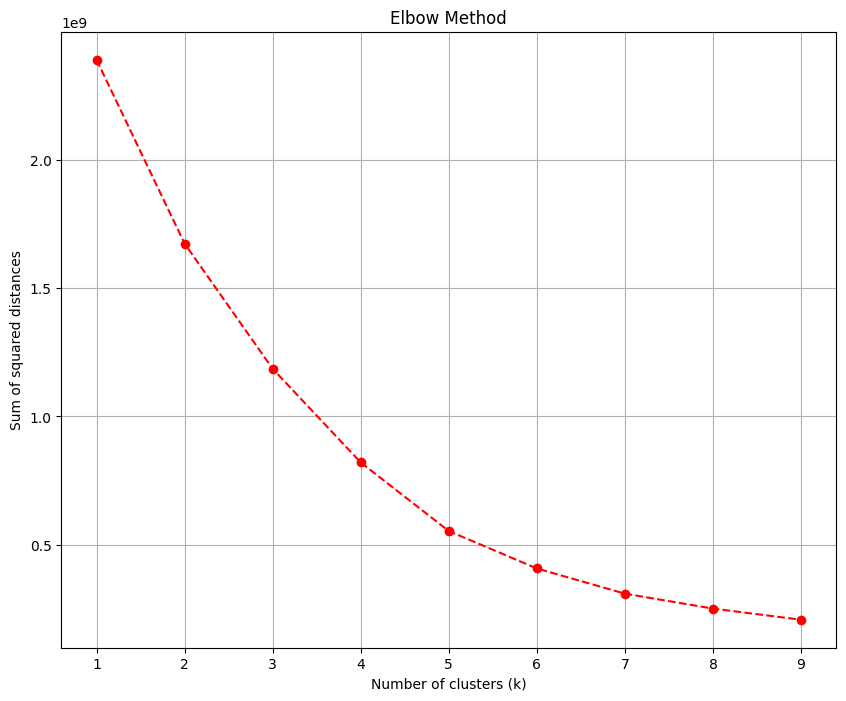

In [13]:
viz.elbow_method(df_model)


In [14]:
k = 7  # Number of clusters chosen
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(df_model)
centroids = kmeans.cluster_centers_

c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
clusters = []
for _, point in df_model.iterrows():
    if point.isnull().any():  # Skip data points with missing values
        continue
    distances = []
    for centroid in centroids:
        if np.isnan(centroid).any():  # Skip centroids with missing values
            continue
        distance = np.sqrt(np.sum((np.array(point) - np.array(centroid)) ** 2))  # Euclidean distance calculation
        distances.append(distance)
    if distances:  # Check if distances list is not empty
        closest_cluster = np.argmin(distances)  # Index of the centroid with the smallest distance
        clusters.append(closest_cluster)

# 'clusters' now contains the cluster assignments for each data point


In [16]:
#df_model = df_model.reset_index(drop=True)  # Reset the index of the DataFrame

updated_centroids = []
for cluster_id in range(k):  # K represents the number of clusters
    cluster_points = df_model.iloc[np.where(clusters == cluster_id)[0]]  # Filter data points for the current cluster
    centroid = cluster_points.mean(axis=0)  # Calculate the mean along each feature axis
    updated_centroids.append(centroid)

c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


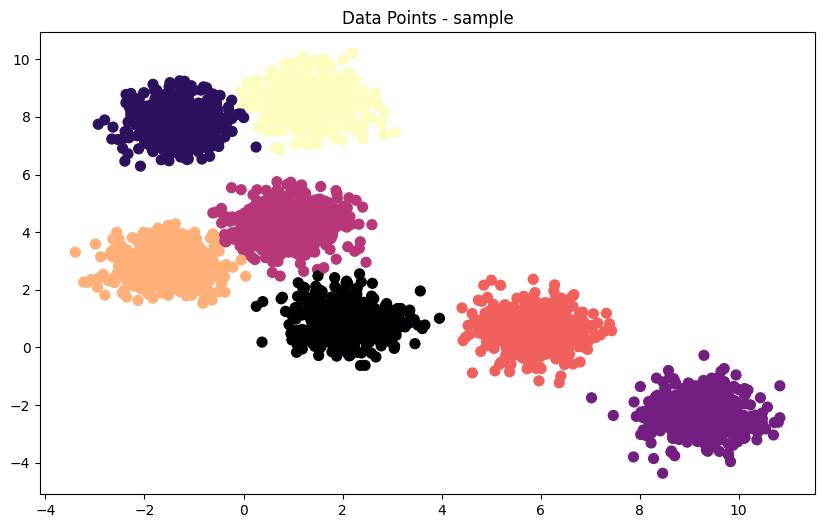

In [30]:
n_samples = 3000
X, y_true = make_blobs(n_samples=n_samples, centers=k, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='magma')
plt.title("Data Points - sample")
plt.savefig('image/plots/Data_points_sample.png')
plt.show()

c:\Users\PaulaMachado\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


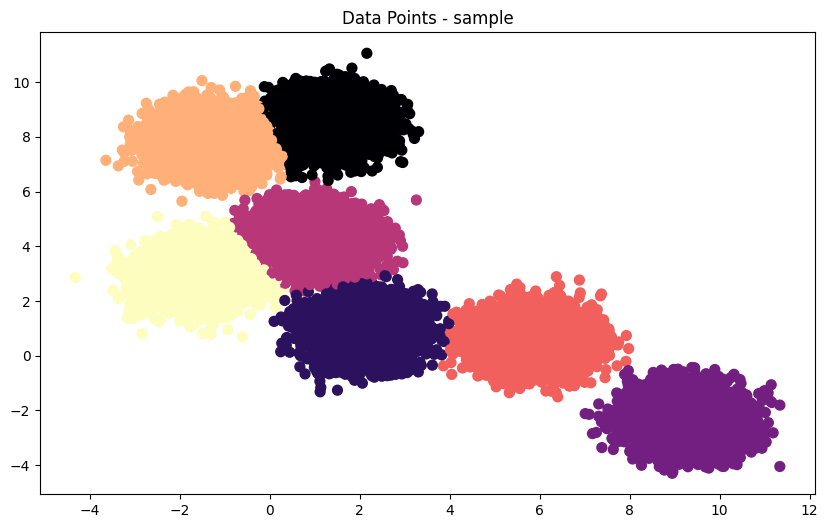

In [42]:
n_samples = len(df_model)
X, y_true = make_blobs(n_samples=n_samples, centers=k, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='magma')
plt.title("Data Points - sample")
plt.savefig('image/plots/Data_points_full.png')
plt.show()

In [43]:
    # --- Initializing Centroids as Random Points from Data --- 
    init_centroids = np.random.choice(range(n_samples), size=k, replace=False)

    centroid_dict = {}
    for i, c in zip(range(k), init_centroids):
        centroid_dict[i] = X[c]

    cluster_dict = {}
    for i in range(k):
        cluster_dict[i] = []

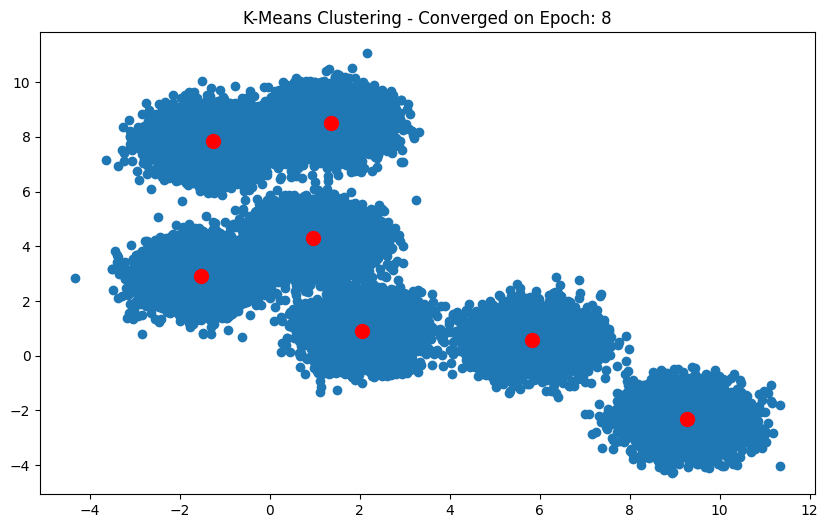

In [44]:
epochs = 100
"""
# --- Training--- 
centroid_dict, cluster_dict, epoch = model.train(centroid_dict, cluster_dict, X, epochs)

# --- Plotting Results --- 
viz.plot_results(centroid_dict, cluster_dict, X, epoch)
"""